In [ ]:
# Cargar librerías
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt  # Generación de gráficos
import seaborn as sns  # Visualización de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Cargar datos desde Google Drive o subir manualmente
from google.colab import files
uploaded = files.upload()

# Leer el archivo CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

#head - muestra un ejemplo con 5 registros
df.head()

Saving Advertising.csv to Advertising (1).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
print(df.describe())  # Estadísticas descriptivas de las variables numéricas

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


**Descripción de variables **

*  TV : Televisión
*  Radio : Radio
*  Newspaper : Periodico
*   Sales: Ventas







**División en conjunto de entrenamiento, validación y prueba**

Limpieza de datos

In [ ]:
# Verificar si hay valores NaN en el DataFrame
print(df.isnull().values.any())

# Contar la cantidad de valores NaN por columna
print(df.isnull().sum())

# Mostrar las filas que contienen valores NaN
print(df[df.isnull().any(axis=1)])

False
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


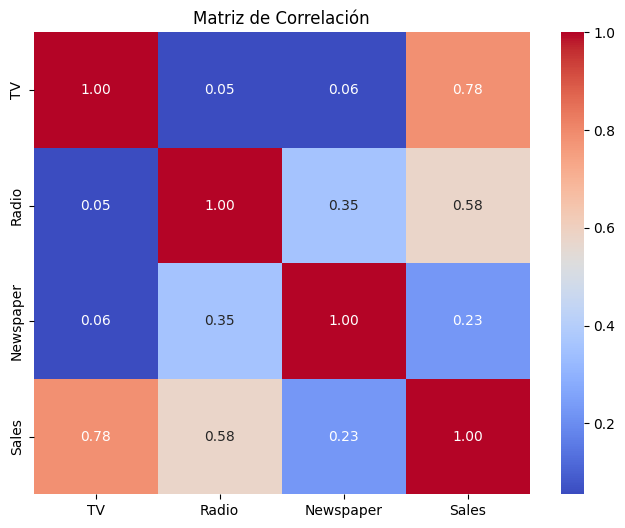

In [ ]:
# Análisis de Correlación

import matplotlib.pyplot as plt
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Analizando la distribución de los datos**

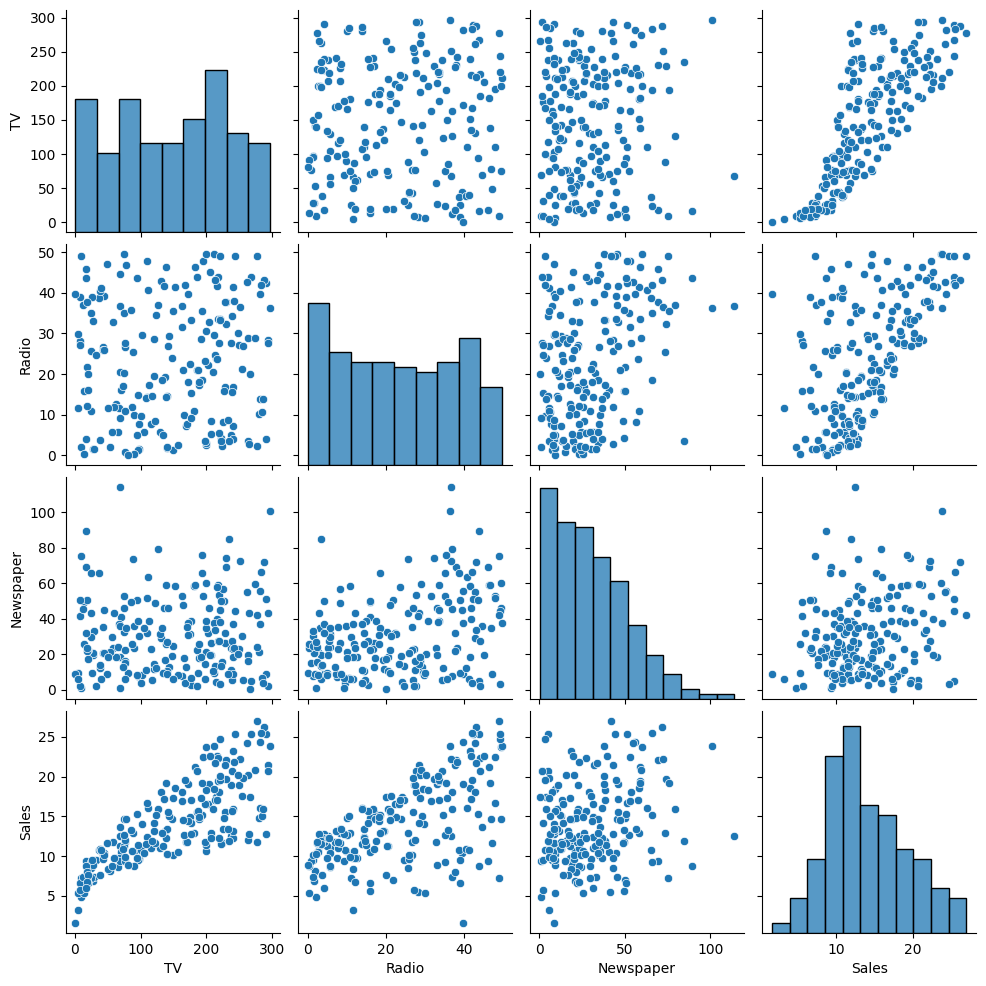

In [ ]:
import seaborn as sns  # Visualización de datos
import matplotlib.pyplot as plt  # Generación de gráficos

# Selección de características numéricas relevantes para el modelo
#features = df.drop(["MEDV","Latitude",'Longitude'], axis=1) #Carga todos los campos excepto MEDV, Latitud y Longitud
features = ["TV","Radio","Newspaper"]
target = "Sales"  # Variable objetivo, con el que se va a contrastar

# Visualización de la distribución de los datos con gráficos de pares
sns.pairplot(df[[*features, target]])
plt.show()

División de los datos en conjuntos de entrenamiento y pruebas

In [ ]:
# Selección de variables
features = df.drop(columns=["Sales"], axis=1) # En el eje x quita los datos de ventas

# Elige Sales como variable dependiente | En el eje y deja los datos de ventas
target = df["Sales"] 

# División 60% entrenamiento, 20% validación, 20% prueba
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaño entrenamiento: {X_train.shape}, validación: {X_val.shape}, prueba: {X_test.shape}")


Tamaño entrenamiento: (120, 3), validación: (40, 3), prueba: (40, 3)


Normalización de los datos

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Visualización de las distribuciones de los datos en los diferentes conjuntos

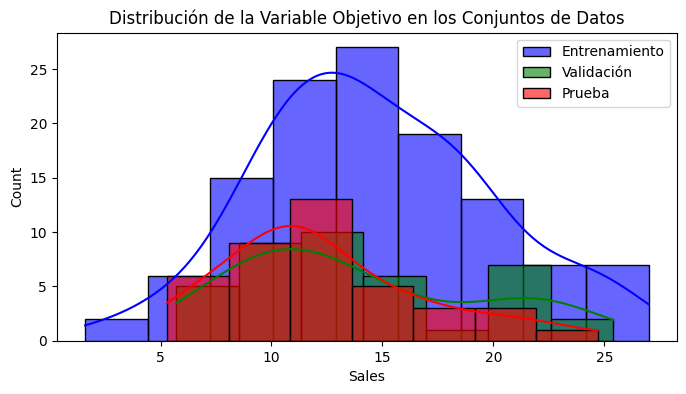

In [ ]:

plt.figure(figsize=(8, 4))
sns.histplot(y_train, kde=True, color='blue', label='Entrenamiento', alpha=0.6)
sns.histplot(y_val, kde=True, color='green', label='Validación', alpha=0.6)
sns.histplot(y_test, kde=True, color='red', label='Prueba', alpha=0.6)
plt.legend()
plt.title("Distribución de la Variable Objetivo en los Conjuntos de Datos")
plt.show()

Visualización de los datos antes y después de la normalización

Text(0.5, 1.0, 'Datos Originales')

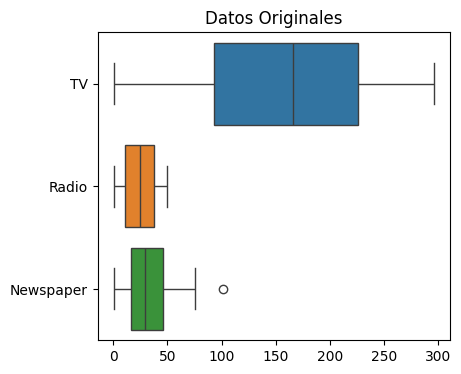

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, orient='h')
plt.title("Datos Originales")

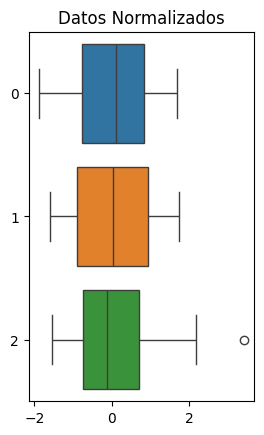

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled, orient='h')
plt.title("Datos Normalizados")
plt.show()

In [ ]:
# Entrenar modelo de regresión lineal
model = LinearRegression() #
model.fit(X_train_scaled, y_train)

# Predicción | X_test_scaled -> los datos de prueba
y_pred = model.predict(X_test_scaled)

# Evaluación de 3 tipos de errores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.2f}") # error cuadritico medio, proemedio de los errores elevando al cuadrado
print(f"RMSE: {rmse:.2f}") # raiz cuadrada del primero
print(f"MAE: {mae:.2f}") # Error promedio absoluto

MSE: 3.77
RMSE: 1.94
MAE: 1.55


In [ ]:
# Verificar estadísticas del campo MEDV de las casas
print(f"Mínimo: {y_test.min()}")
print(f"Máximo: {y_test.max()}")
print(f"Media: {y_test.mean()}")
print(f"Desviación estándar: {y_test.std()}")

Mínimo: 5.3
Máximo: 24.7
Media: 12.290000000000001
Desviación estándar: 4.563613053553522


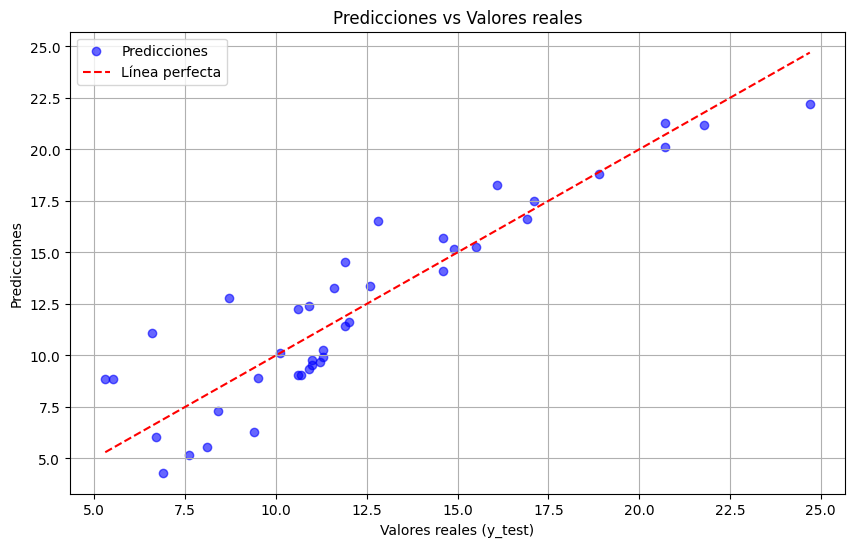

In [ ]:
import matplotlib.pyplot as plt

# Graficar valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea perfecta')

plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 5 muestras aleatorias
n_muestras = 5
muestras_reales = X_test.sample(n=n_muestras, random_state=42)

# Obtener los valores reales correspondientes
y_reales = y_test[muestras_reales.index]

# Mostrar las muestras reales con sus valores reales
print("\n Muestras reales seleccionadas:")
print(muestras_reales)
print("\n Valores reales asociados:")
print(y_reales)


 Muestras reales seleccionadas:
        TV  Radio  Newspaper
79   116.0    7.7       23.1
41   177.0   33.4       38.7
195   38.2    3.7       13.8
38    43.1   26.7       35.1
82    75.3   20.3       32.5

 Valores reales asociados:
79     11.0
41     17.1
195     7.6
38     10.1
82     11.3
Name: Sales, dtype: float64


In [ ]:
# Normalizar las muestras seleccionadas
muestras_reales_scaled = scaler.transform(muestras_reales)

In [ ]:
# Hacer predicciones con el modelo entrenado
y_pred_reales = model.predict(muestras_reales_scaled)

# Crear un DataFrame con las predicciones y los valores reales
resultado = pd.DataFrame({
    'Valor Real': y_reales.values,
    'Predicción': y_pred_reales
}, index=muestras_reales.index)

# Mostrar el resultado
print("\n Comparación de valores reales vs predicciones:")
print(resultado)


 Comparación de valores reales vs predicciones:
     Valor Real  Predicción
79         11.0    9.517535
41         17.1   17.490177
195         7.6    5.150289
38         10.1   10.116358
82         11.3   10.270275


In [ ]:
# Calcular la diferencia absoluta y porcentual
resultado["Diferencia Absoluta"] = abs(resultado["Valor Real"] - resultado["Predicción"])
resultado["Error Porcentual"] = (resultado["Diferencia Absoluta"] / resultado["Valor Real"]) * 100

# Mostrar el resultado
print("\n Resultados con diferencias y error porcentual:\n")
print(resultado)


 Resultados con diferencias y error porcentual:

     Valor Real  Predicción  Diferencia Absoluta  Error Porcentual
79         11.0    9.517535             1.482465         13.476954
41         17.1   17.490177             0.390177          2.281738
195         7.6    5.150289             2.449711         32.233040
38         10.1   10.116358             0.016358          0.161958
82         11.3   10.270275             1.029725          9.112606


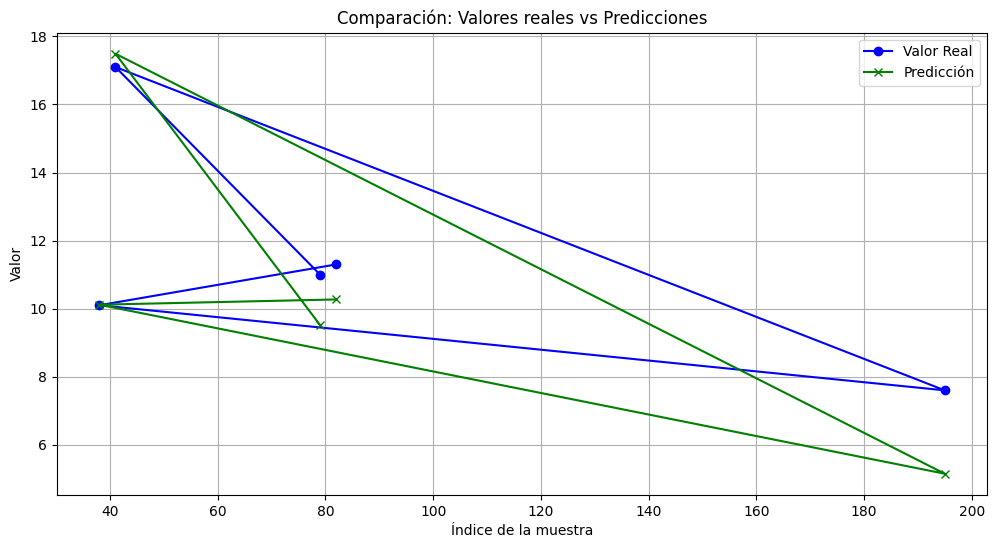

In [ ]:
import matplotlib.pyplot as plt

# Graficar comparación
plt.figure(figsize=(12, 6))

# Valores reales
plt.plot(resultado.index, resultado["Valor Real"], label="Valor Real", marker='o', color='blue')

# Predicciones
plt.plot(resultado.index, resultado["Predicción"], label="Predicción", marker='x', color='green')

plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Comparación: Valores reales vs Predicciones")
plt.legend()
plt.grid(True)
plt.show()